In [1]:
import scanpy as sc
import pandas as pd
import pickle
import numpy as np
import graph_tool.all as gt

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/all.py:40: RuntimeWarning: Error importing draw module, proceeding nevertheless: /usr/lib/python3/dist-packages/cairo/_cairo.cpython-37m-x86_64-linux-gnu.so: undefined symbol: cairo_tee_surface_index
  warnings.warn(msg, RuntimeWarning)


In [2]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
state = pickle.load( open( "adata_10x/10x_equilibrate2_state.pkl", "rb" ) )

In [4]:
state

<NestedBlockState object, with base <BlockState object with 68 blocks (63 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7fad63385490>, at 0x7fad8d3aaa10>, and 10 levels of sizes [(860, 63), (63, 15), (15, 5), (5, 3), (3, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2)] at 0x7fad8d3ca050>

In [5]:
n_state = pickle.load( open( "adata_10x/10x_nested_state.pkl", "rb" ) ) 

In [6]:
n_state

<NestedBlockState object, with base <BlockState object with 63 blocks (63 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7fad8d3aad90>, at 0x7fad8d35ef50>, and 5 levels of sizes [(860, 63), (63, 15), (15, 5), (5, 2), (2, 1)] at 0x7fad8d3c4050>

In [7]:
g = pickle.load( open( "adata_10x/10x_graph_g.pkl", "rb" ) ) #ho gia il grafo caricato

# 1) cambio la bs di equilibrate

In [17]:
BS=[]
for i in range(10,34,4):
    bs = n_state.get_bs()                   
    bs += [np.zeros(1)] * (i - len(bs))
    BS.append(bs)

In [21]:
bs10=BS[0]
bs14=BS[1]
bs18=BS[2]
bs22=BS[3]
bs26=BS[4]
bs30=BS[5]

In [22]:
print(len(bs1),len(bs2),len(bs3),len(bs4),len(bs5),len(bs6))

10 14 18 22 26 30


In [36]:
h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

### 1a) bs 10

In [75]:
state = n_state.copy(bs=bs10, sampling=True)
state.mcmc_sweep(niter=1000)
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)

(19557.05935933993, 96838134, 29746848)

In [76]:
pickle.dump(state, open('adata_10x/10x_bs/bs_10.pkl', 'wb'), 2)

In [77]:
pickle.dump(h, open('adata_10x/10x_bs/h_bs_10.pkl', 'wb'), 2)

In [78]:
h10= pickle.load( open( "adata_10x/10x_bs/h_bs_10.pkl", "rb" ) )

In [79]:
state10= pickle.load( open( "adata_10x/10x_bs/bs_10.pkl", "rb" ) )
state10

<NestedBlockState object, with base <BlockState object with 70 blocks (67 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7fad5447a550>, at 0x7fad54446750>, and 10 levels of sizes [(860, 67), (67, 18), (18, 7), (7, 4), (4, 3), (3, 2), (2, 2), (2, 2), (2, 2), (2, 2)] at 0x7fad5447a510>

### 1b) bs 14

In [ ]:
state = n_state.copy(bs=bs14, sampling=True)
state.mcmc_sweep(niter=1000)
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)

In [39]:
pickle.dump(state, open('adata_10x/10x_bs/bs_14.pkl', 'wb'), 2)

In [40]:
pickle.dump(h, open('adata_10x/10x_bs/h_bs_14.pkl', 'wb'), 2)

In [41]:
h14= pickle.load( open( "adata_10x/10x_bs/h_bs_14.pkl", "rb" ) )

In [64]:
state14= pickle.load( open( "adata_10x/10x_bs/bs_14.pkl", "rb" ) )
state14

<NestedBlockState object, with base <BlockState object with 71 blocks (69 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7fad558c0bd0>, at 0x7fad5592e0d0>, and 14 levels of sizes [(860, 69), (69, 18), (18, 8), (8, 4), (4, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (1, 1), (1, 1), (1, 1)] at 0x7fad5589fd10>

### 1c) bs 18

In [42]:
state = n_state.copy(bs=bs18, sampling=True)
state.mcmc_sweep(niter=1000)
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)

(19570.535341362, 97791525, 30906964)

In [43]:
pickle.dump(state, open('adata_10x/10x_bs/bs_18.pkl', 'wb'), 2)

In [44]:
pickle.dump(h, open('adata_10x/10x_bs/h_bs_18.pkl', 'wb'), 2)

In [45]:
h18= pickle.load( open( "adata_10x/10x_bs/h_bs_18.pkl", "rb" ) )

In [65]:
state18= pickle.load( open( "adata_10x/10x_bs/bs_18.pkl", "rb" ) )
state18

<NestedBlockState object, with base <BlockState object with 70 blocks (67 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7fad55936a10>, at 0x7fad5592c910>, and 18 levels of sizes [(860, 67), (67, 17), (17, 8), (8, 4), (4, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7fad55896150>

### 1d) bs 22

In [46]:
state = n_state.copy(bs=bs22, sampling=True)
state.mcmc_sweep(niter=1000)
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)

(19579.467675697037, 98295791, 31045549)

In [47]:
pickle.dump(state, open('adata_10x/10x_bs/bs_22.pkl', 'wb'), 2)

In [48]:
pickle.dump(h, open('adata_10x/10x_bs/h_bs_22.pkl', 'wb'), 2)

In [49]:
h22= pickle.load( open( "adata_10x/10x_bs/h_bs_22.pkl", "rb" ) )

In [66]:
state22= pickle.load( open( "adata_10x/10x_bs/bs_22.pkl", "rb" ) )
state22

<NestedBlockState object, with base <BlockState object with 71 blocks (69 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7fad55881ed0>, at 0x7fad55af3410>, and 22 levels of sizes [(860, 69), (69, 16), (16, 6), (6, 5), (5, 5), (5, 5), (5, 4), (4, 4), (4, 3), (3, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7fad5592c390>

### 1e) bs 26

In [50]:
state = n_state.copy(bs=bs26, sampling=True)
state.mcmc_sweep(niter=1000)
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)

(19555.91832399619, 98975480, 31140154)

In [51]:
pickle.dump(state, open('adata_10x/10x_bs/bs_26.pkl', 'wb'), 2)

In [52]:
pickle.dump(h, open('adata_10x/10x_bs/h_bs_26.pkl', 'wb'), 2)

In [53]:
h26= pickle.load( open( "adata_10x/10x_bs/h_bs_26.pkl", "rb" ) )

In [67]:
state26= pickle.load( open( "adata_10x/10x_bs/bs_26.pkl", "rb" ) )
state26

<NestedBlockState object, with base <BlockState object with 72 blocks (70 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7fad5592c2d0>, at 0x7fad557ed4d0>, and 26 levels of sizes [(860, 70), (70, 19), (19, 6), (6, 4), (4, 4), (4, 3), (3, 3), (3, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7fad5592c050>

### 1f) bs 30

In [54]:
state = n_state.copy(bs=bs30, sampling=True)
state.mcmc_sweep(niter=1000)
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)

(19558.314833499808, 99418337, 31356712)

In [55]:
pickle.dump(state, open('adata_10x/10x_bs/bs_30.pkl', 'wb'), 2)

In [56]:
pickle.dump(h, open('adata_10x/10x_bs/h_bs_30.pkl', 'wb'), 2)

In [57]:
h30= pickle.load( open( "adata_10x/10x_bs/h_bs_30.pkl", "rb" ) )

In [68]:
state30= pickle.load( open( "adata_10x/10x_bs/bs_30.pkl", "rb" ) )
state30

<NestedBlockState object, with base <BlockState object with 73 blocks (72 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7fad5592c890>, at 0x7fad55756d50>, and 30 levels of sizes [(860, 72), (72, 18), (18, 6), (6, 4), (4, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7fad557ee490>

<IPython.core.display.Javascript object>


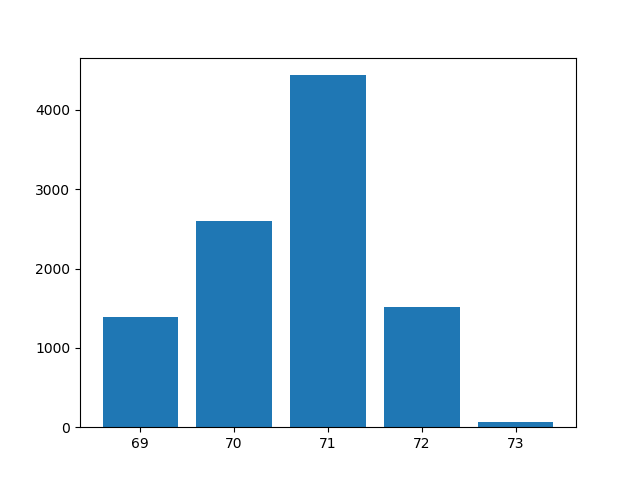

<IPython.core.display.Javascript object>


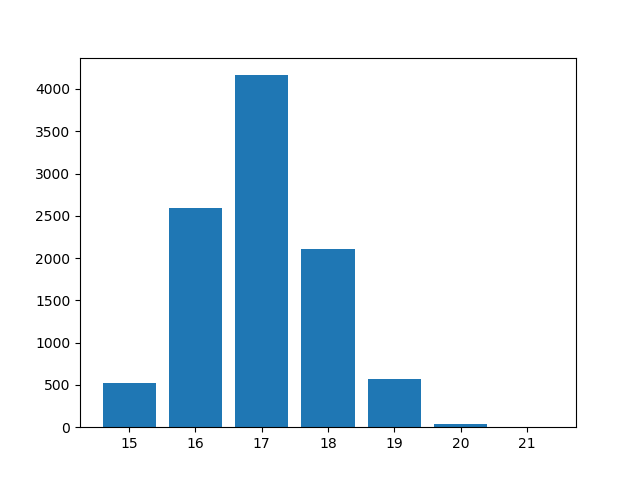

<IPython.core.display.Javascript object>


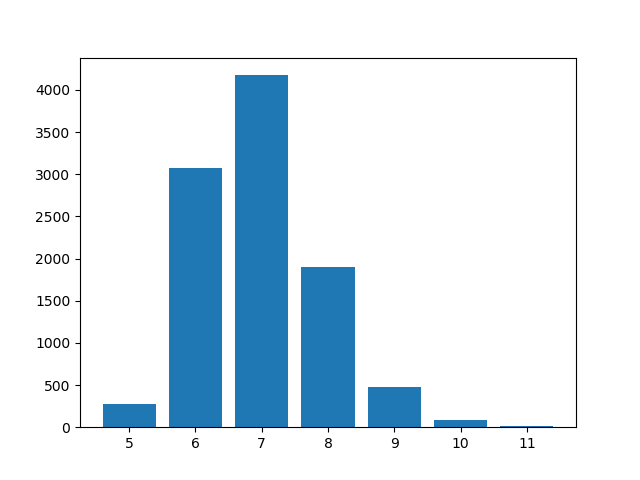

<IPython.core.display.Javascript object>


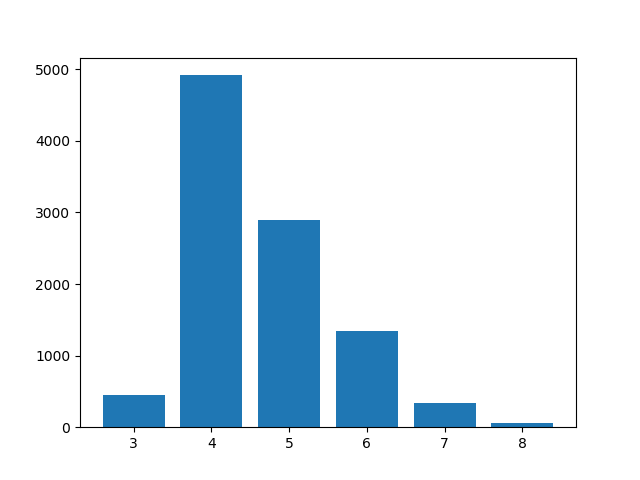

<IPython.core.display.Javascript object>


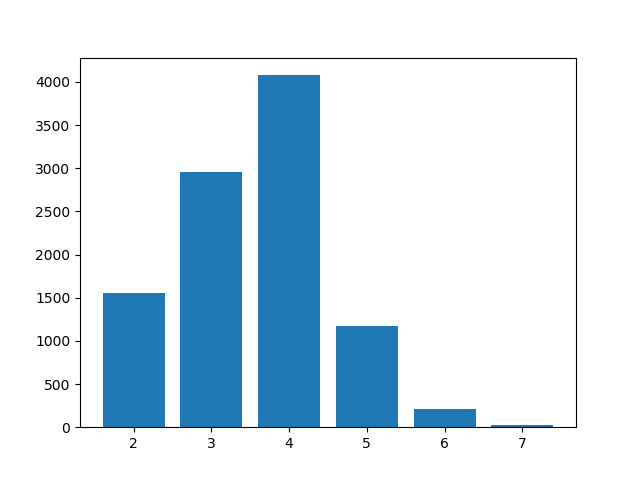

<IPython.core.display.Javascript object>


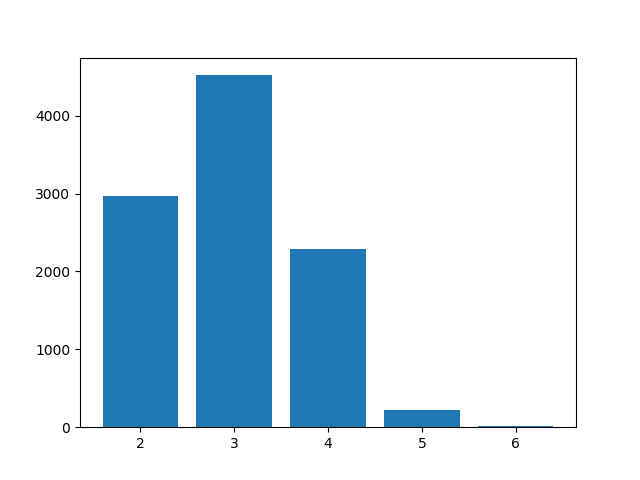

<IPython.core.display.Javascript object>


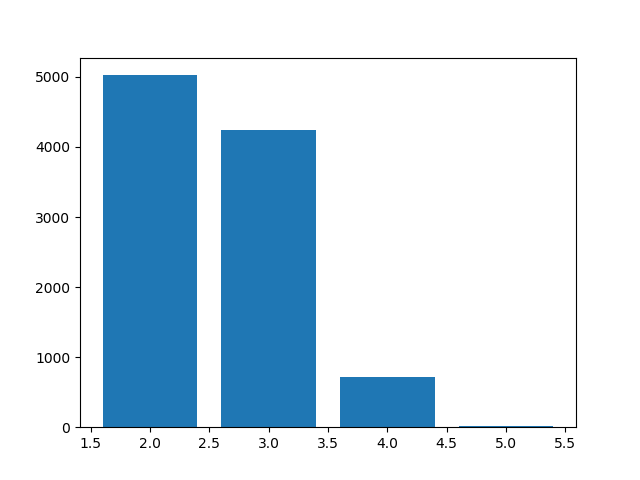

<IPython.core.display.Javascript object>


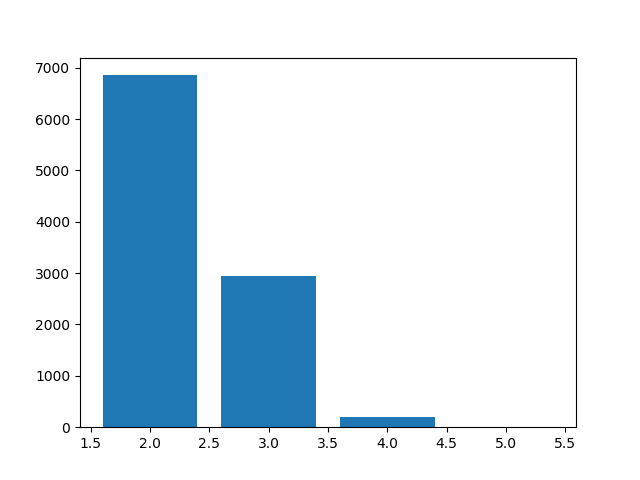

<IPython.core.display.Javascript object>


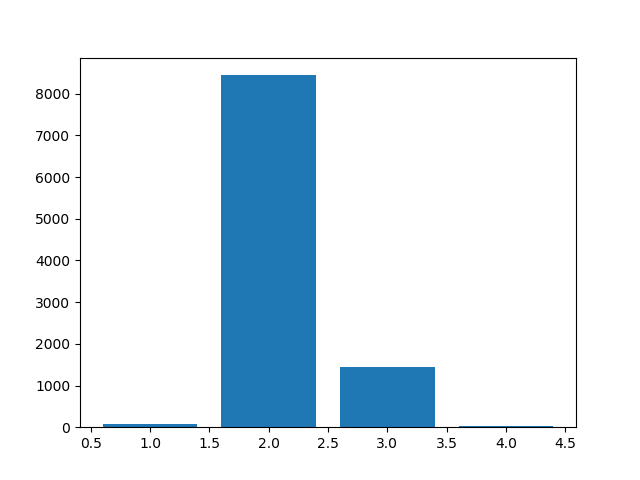

<IPython.core.display.Javascript object>


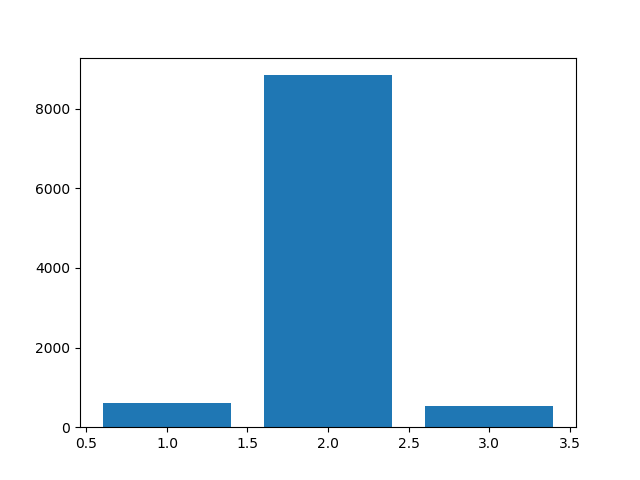

<IPython.core.display.Javascript object>


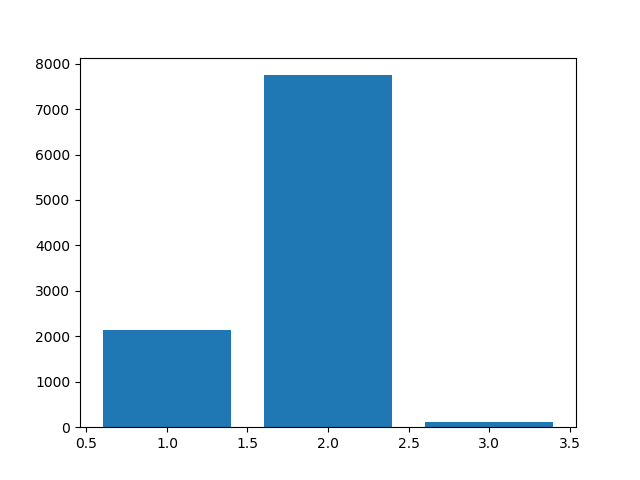

<IPython.core.display.Javascript object>


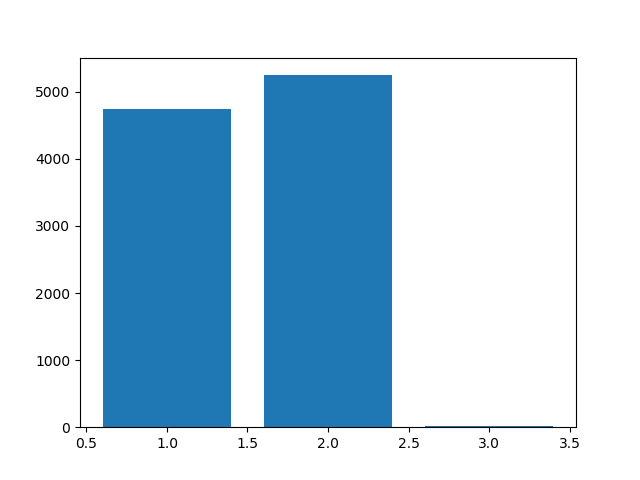

<IPython.core.display.Javascript object>


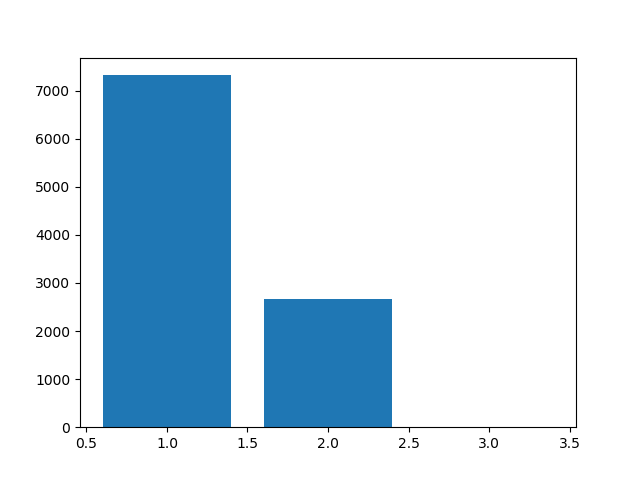

<IPython.core.display.Javascript object>


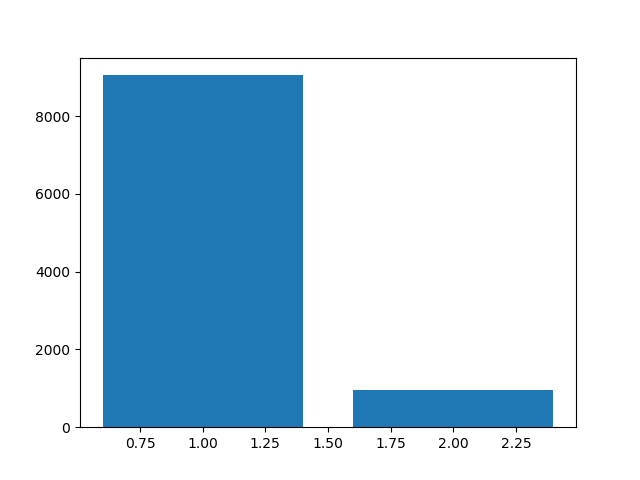

<IPython.core.display.Javascript object>


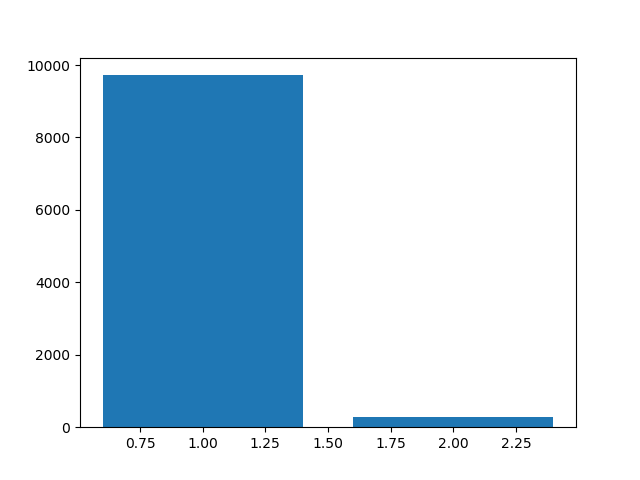

<IPython.core.display.Javascript object>


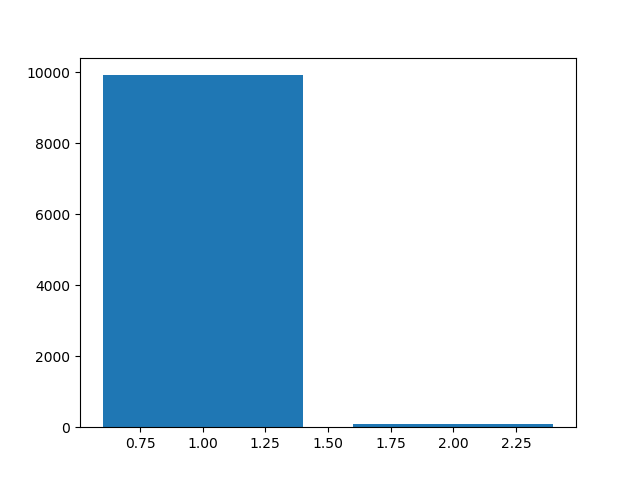

<IPython.core.display.Javascript object>


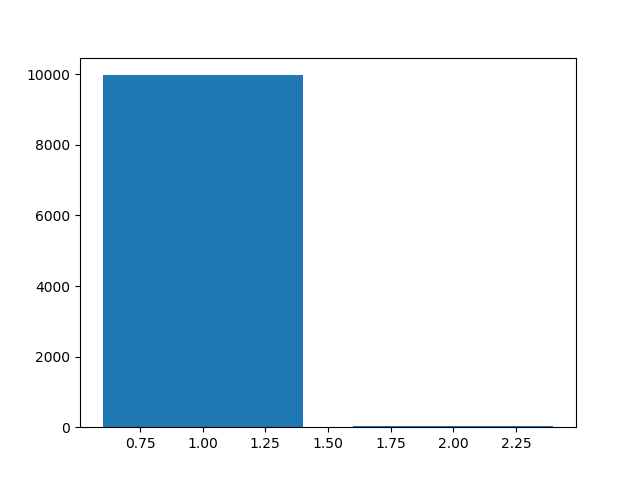

<IPython.core.display.Javascript object>


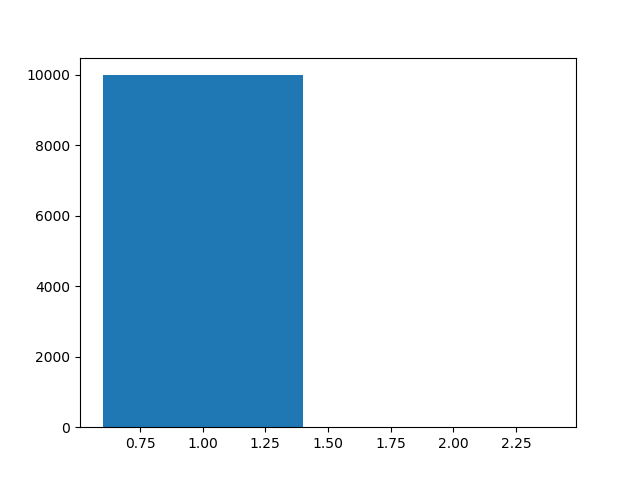

<IPython.core.display.Javascript object>


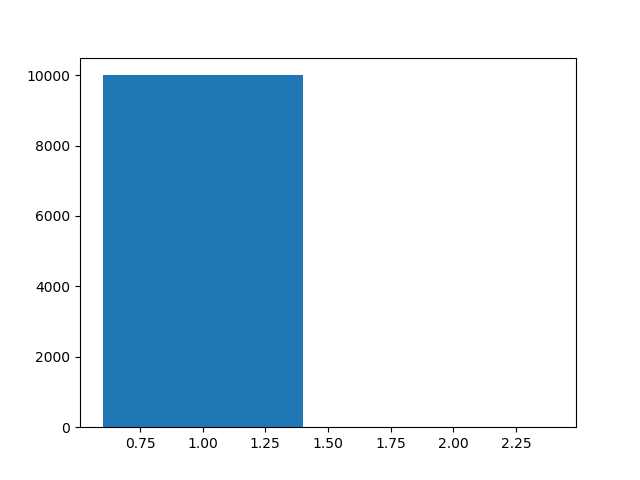

<IPython.core.display.Javascript object>


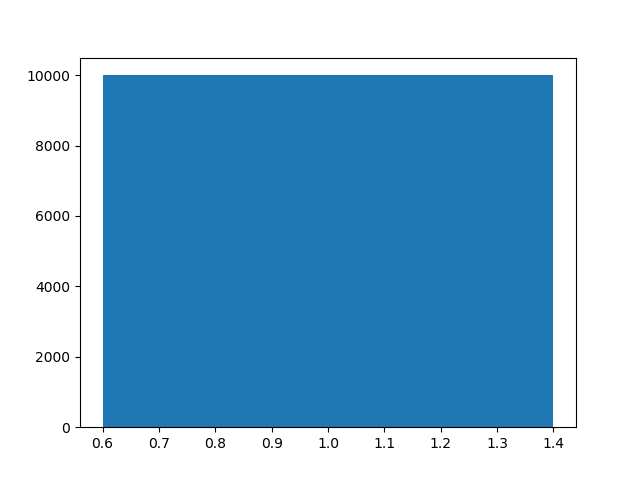

<IPython.core.display.Javascript object>


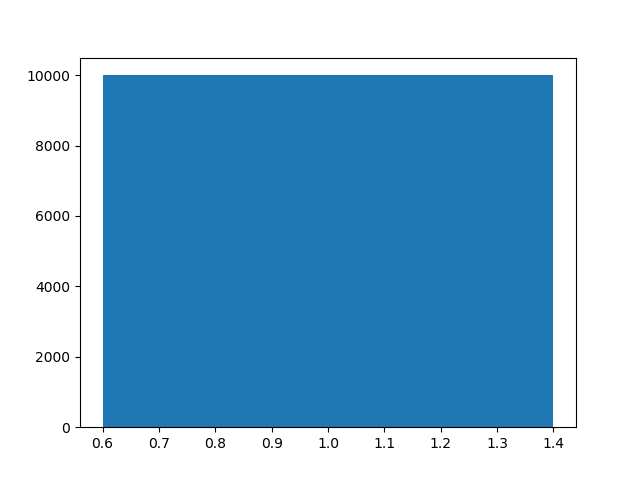

<IPython.core.display.Javascript object>


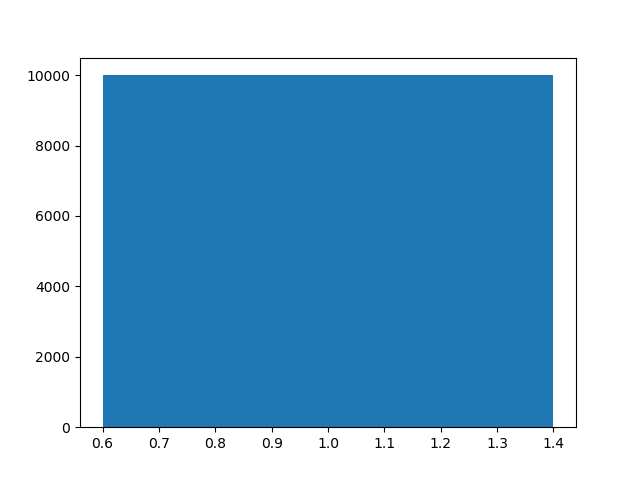

<IPython.core.display.Javascript object>


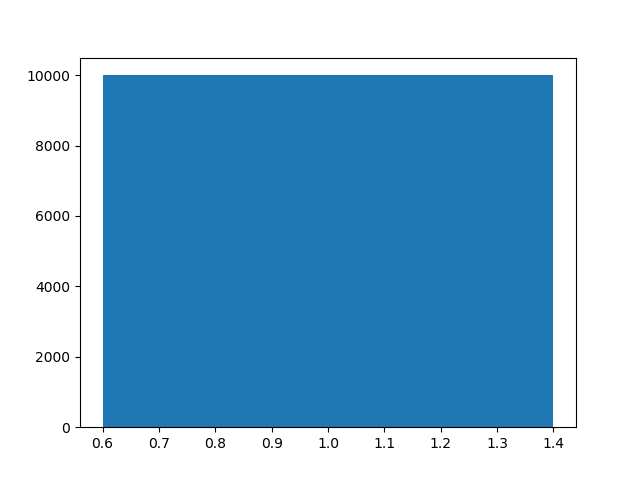

<IPython.core.display.Javascript object>


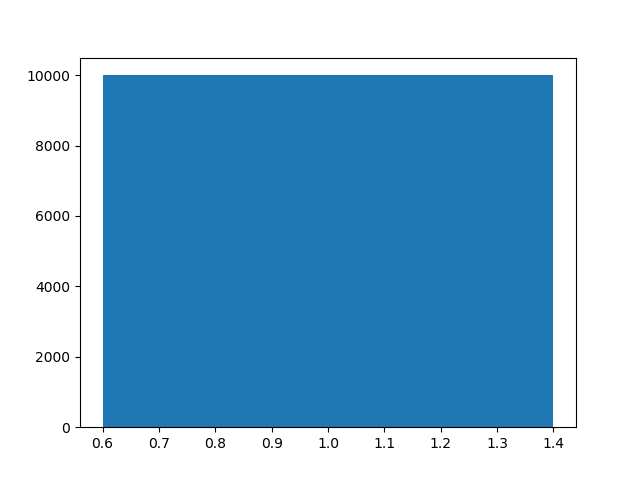

<IPython.core.display.Javascript object>


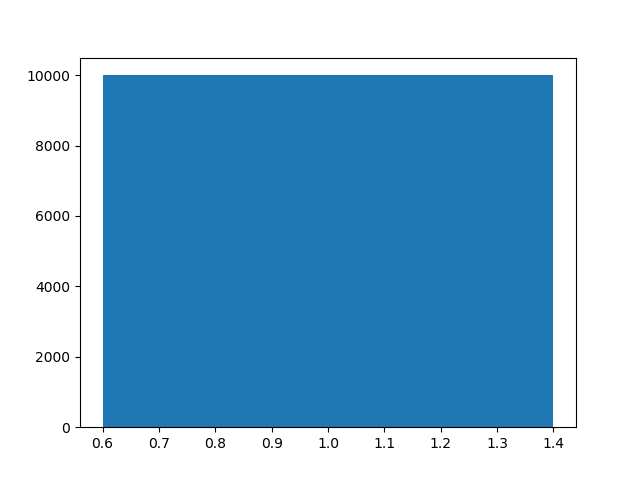

<IPython.core.display.Javascript object>


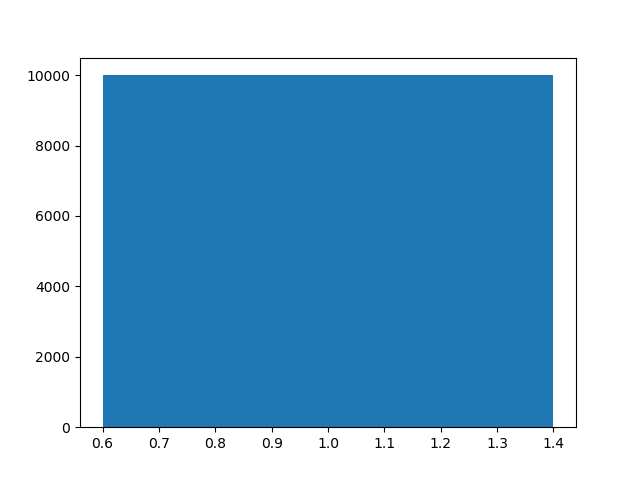

<IPython.core.display.Javascript object>


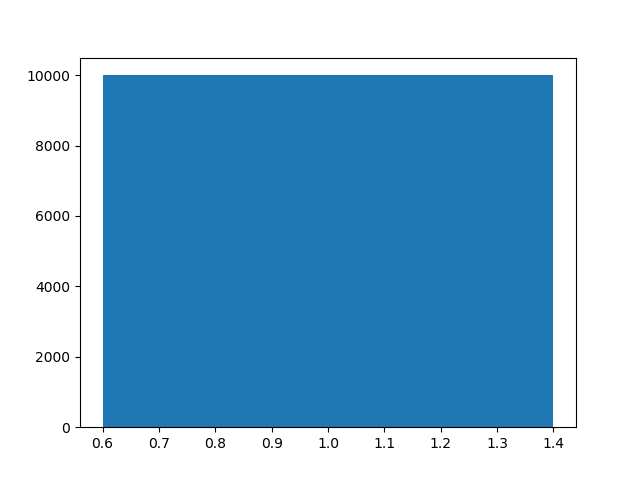

<IPython.core.display.Javascript object>


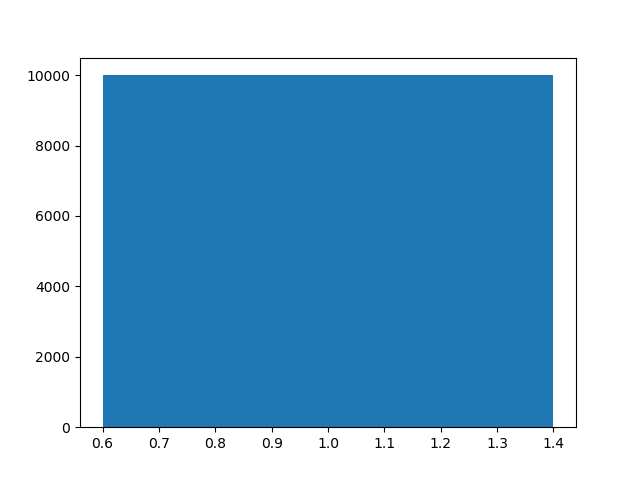

<IPython.core.display.Javascript object>


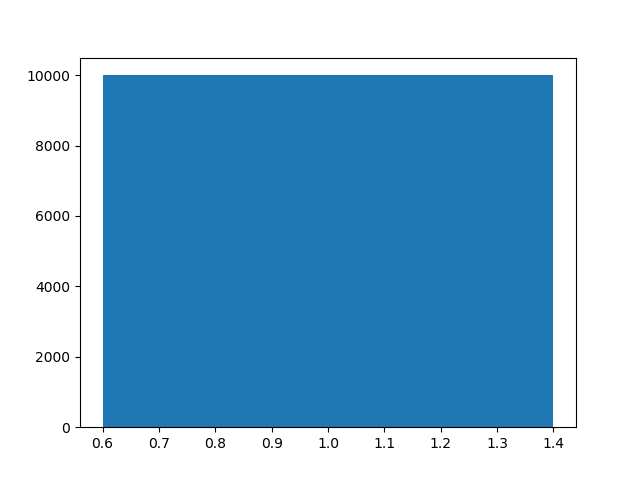

<IPython.core.display.Javascript object>


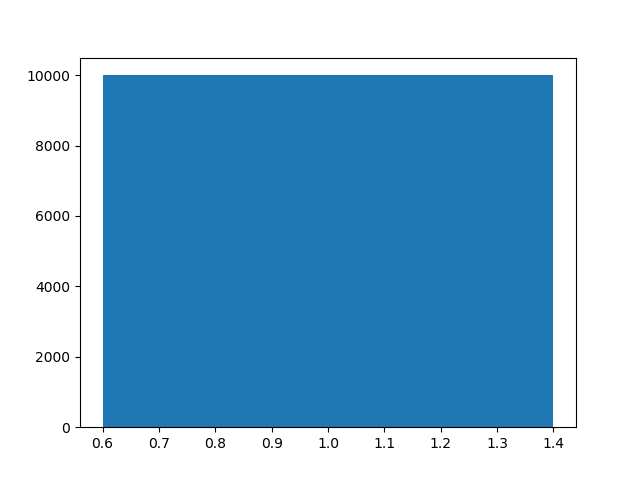

In [74]:
for l in range (0,len(bs30)):
    idxs= np.where(h30[l] > 0)[0]
    v = h30[l][idxs]
    figure(l)
    bar(idxs, v)

# 2) cambio force niter
### 2a) force niter 10000

In [21]:
bs = n_state.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

In [22]:
state = n_state.copy(bs=bs, sampling=True)

In [23]:
state.mcmc_sweep(niter=1000)

(0.019067583178376424, 949992, 293705)

In [24]:
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

(19586.229098220618, 50476106, 15732297)

In [25]:
h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

In [26]:
gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19555.656209364588, 96437963, 30426306)

In [27]:
state

<NestedBlockState object, with base <BlockState object with 69 blocks (65 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 65), (65, 14), (14, 7), (7, 4), (4, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2)] at 0x7f23e811df50>

In [28]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_10.pkl', 'wb'), 2)

In [29]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_10.pkl', 'wb'), 2)

In [74]:
h10= pickle.load( open( "adata_10x/10x_force_niter/h_10.pkl", "rb" ) )

### 2b) 15000 

In [31]:
gt.mcmc_equilibrate(state, force_niter=15000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19542.82090215483, 145335357, 44432083)

In [32]:
state

<NestedBlockState object, with base <BlockState object with 72 blocks (70 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 70), (70, 19), (19, 6), (6, 6), (6, 3), (3, 2), (2, 2), (2, 2), (2, 2), (2, 2)] at 0x7f23e811df50>

In [33]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_15.pkl', 'wb'), 2)

In [34]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_15.pkl', 'wb'), 2)

In [73]:
h15 = pickle.load( open( "adata_10x/10x_force_niter/h_15.pkl", "rb" ) )

### 2c) 20000

In [35]:
gt.mcmc_equilibrate(state, force_niter=20000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19595.474867490306, 194320731, 58435008)

In [36]:
state

<NestedBlockState object, with base <BlockState object with 74 blocks (70 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 70), (70, 17), (17, 7), (7, 4), (4, 3), (3, 3), (3, 2), (2, 2), (2, 2), (2, 2)] at 0x7f23e811df50>

In [37]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_20.pkl', 'wb'), 2)

In [38]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_20.pkl', 'wb'), 2)

In [72]:
h20 = pickle.load( open( "adata_10x/10x_force_niter/h_20.pkl", "rb" ) )

### 2d) 25000

In [39]:
gt.mcmc_equilibrate(state, force_niter=25000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19591.818860822896, 243876493, 71805267)

In [40]:
state

<NestedBlockState object, with base <BlockState object with 78 blocks (74 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 74), (74, 17), (17, 6), (6, 4), (4, 3), (3, 2), (2, 2), (2, 2), (2, 1), (1, 1)] at 0x7f23e811df50>

In [41]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_25.pkl', 'wb'), 2)

In [42]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_25.pkl', 'wb'), 2)

In [71]:
h25 = pickle.load( open( "adata_10x/10x_force_niter/h_25.pkl", "rb" ) )

### 2e) 30000

In [43]:
gt.mcmc_equilibrate(state, force_niter=30000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19594.642503247487, 292330714, 86593308)

In [44]:
state

<NestedBlockState object, with base <BlockState object with 78 blocks (74 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 74), (74, 19), (19, 8), (8, 5), (5, 3), (3, 3), (3, 3), (3, 3), (3, 2), (2, 2)] at 0x7f23e811df50>

In [45]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_30.pkl', 'wb'), 2)

In [46]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_30.pkl', 'wb'), 2)

In [70]:
h30 = pickle.load( open( "adata_10x/10x_force_niter/h_30.pkl", "rb" ) )

### 2f) 35000

In [47]:
gt.mcmc_equilibrate(state, force_niter=35000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19575.085811302863, 341305486, 100620468)

In [48]:
state

<NestedBlockState object, with base <BlockState object with 78 blocks (72 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 72), (72, 17), (17, 7), (7, 4), (4, 4), (4, 3), (3, 2), (2, 2), (2, 2), (2, 2)] at 0x7f23e811df50>

In [49]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_35.pkl', 'wb'), 2)

In [50]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_35.pkl', 'wb'), 2)

In [69]:
h35 = pickle.load( open( "adata_10x/10x_force_niter/h_35.pkl", "rb" ) )

### 2g) 40000

In [51]:
gt.mcmc_equilibrate(state, force_niter=40000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19586.02231770529, 389402016, 115274464)

In [52]:
state

<NestedBlockState object, with base <BlockState object with 78 blocks (74 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 74), (74, 17), (17, 7), (7, 5), (5, 4), (4, 3), (3, 3), (3, 3), (3, 3), (3, 2)] at 0x7f23e811df50>

In [53]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_40.pkl', 'wb'), 2)

In [54]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_40.pkl', 'wb'), 2)

In [68]:
h40 = pickle.load( open( "adata_10x/10x_force_niter/h_40.pkl", "rb" ) )

### 2h) 45000

In [55]:
gt.mcmc_equilibrate(state, force_niter=45000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19584.882138078745, 437982435, 129327919)

In [56]:
state

<NestedBlockState object, with base <BlockState object with 78 blocks (72 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 72), (72, 18), (18, 8), (8, 5), (5, 3), (3, 3), (3, 3), (3, 3), (3, 2), (2, 2)] at 0x7f23e811df50>

In [57]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_45.pkl', 'wb'), 2)

In [58]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_45.pkl', 'wb'), 2)

In [67]:
h45 = pickle.load( open( "adata_10x/10x_force_niter/h_45.pkl", "rb" ) )

### 2i) 50000

In [59]:
gt.mcmc_equilibrate(state, force_niter=50000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19548.424993879882, 486422232, 144928657)

In [60]:
state

<NestedBlockState object, with base <BlockState object with 78 blocks (72 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 72), (72, 16), (16, 7), (7, 3), (3, 3), (3, 3), (3, 3), (3, 2), (2, 2), (2, 2)] at 0x7f23e811df50>

In [61]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_50.pkl', 'wb'), 2)

In [62]:
pickle.dump(h, open("adata_10x/10x_force_niter/h_50.pkl", 'wb'), 2)

In [63]:
h50 = pickle.load( open( "adata_10x/10x_force_niter/h_50.pkl", "rb" ) )

In [64]:
len(h50)

10

<IPython.core.display.Javascript object>


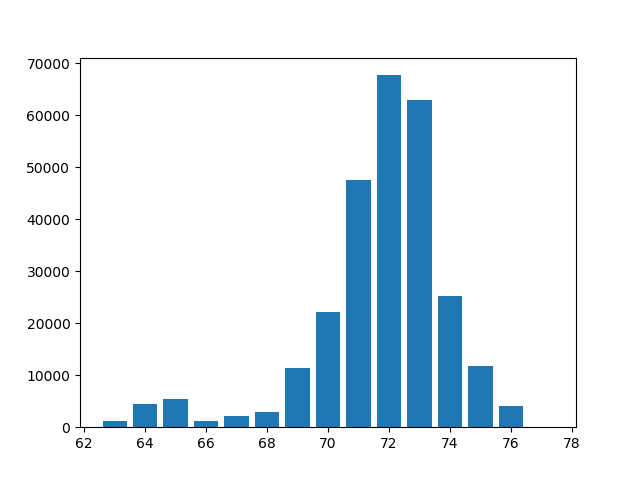

<IPython.core.display.Javascript object>


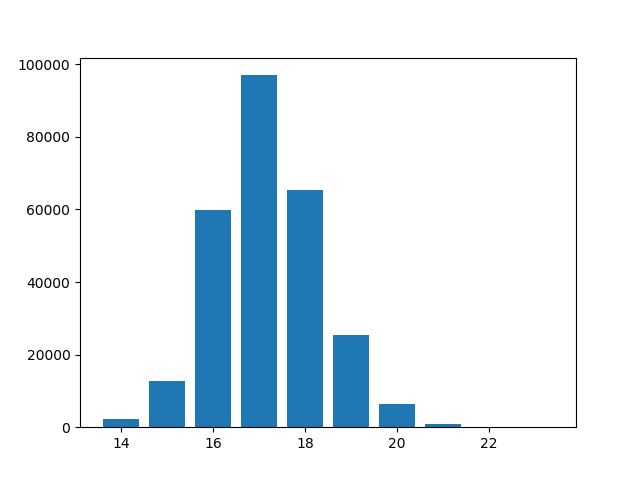

<IPython.core.display.Javascript object>


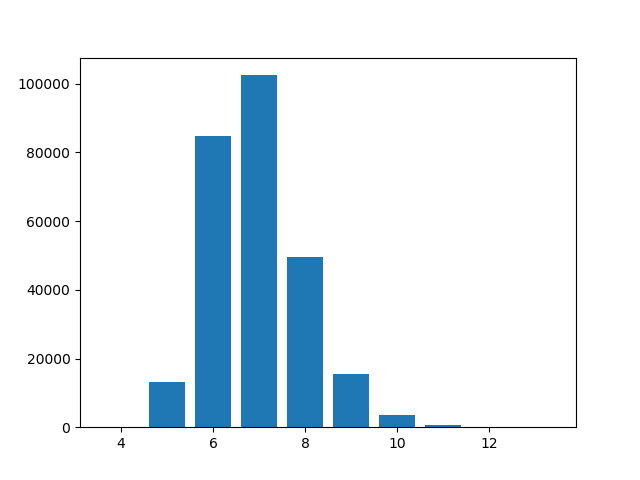

<IPython.core.display.Javascript object>


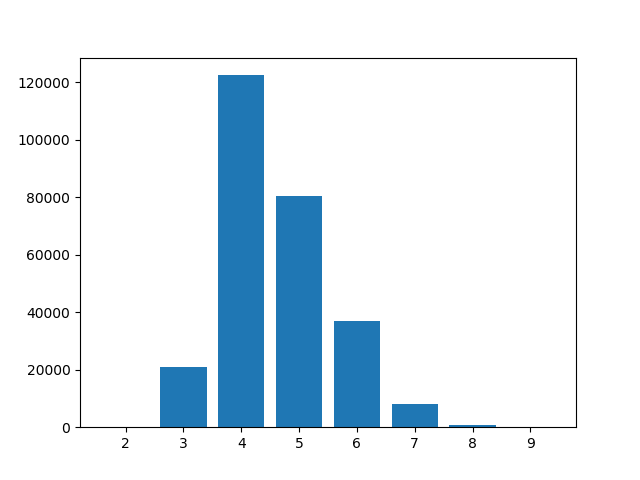

<IPython.core.display.Javascript object>


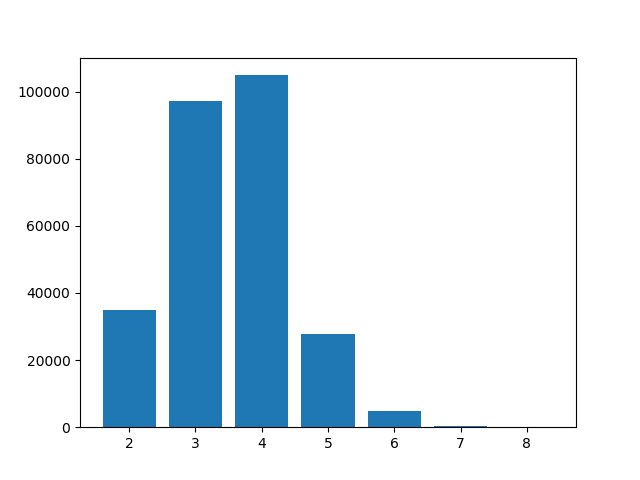

<IPython.core.display.Javascript object>


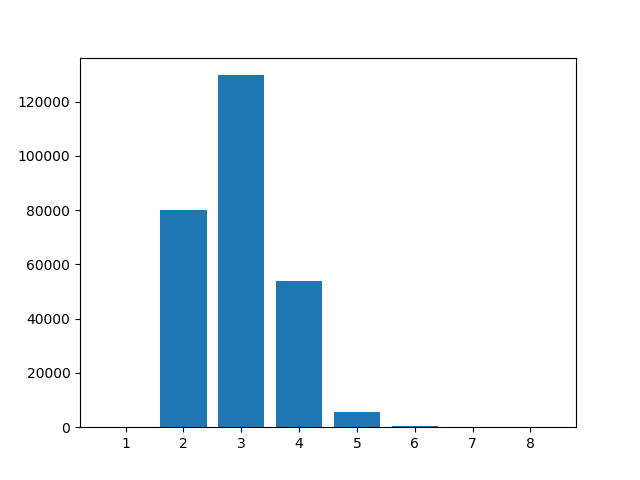

<IPython.core.display.Javascript object>


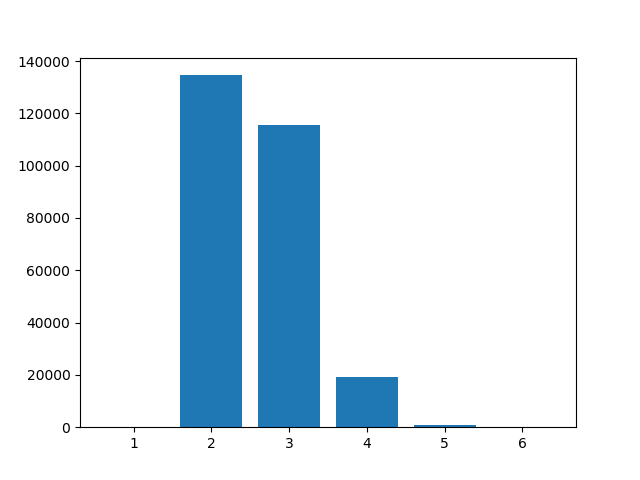

<IPython.core.display.Javascript object>


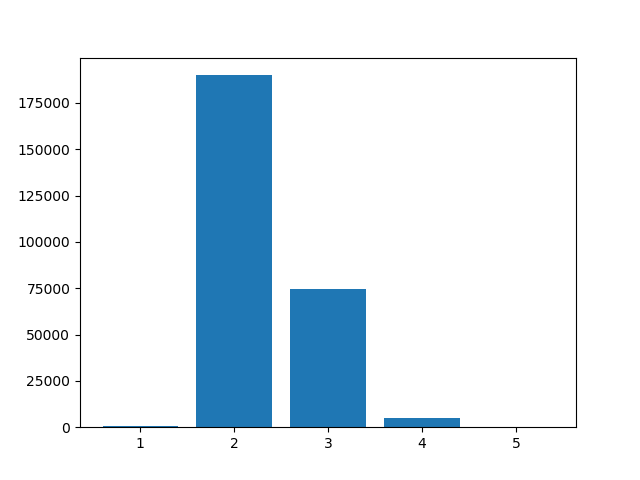

<IPython.core.display.Javascript object>


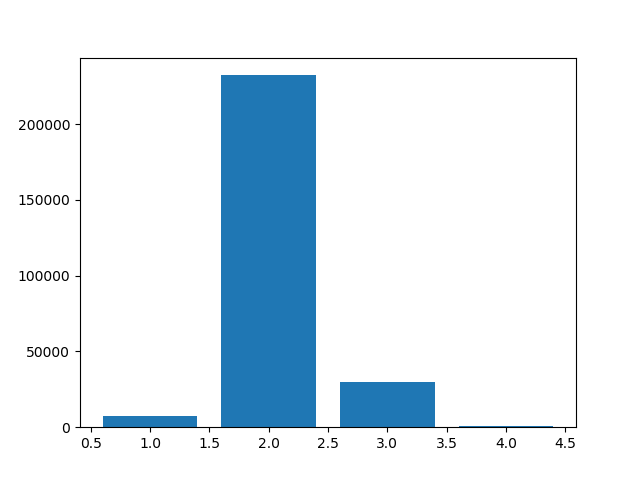

<IPython.core.display.Javascript object>


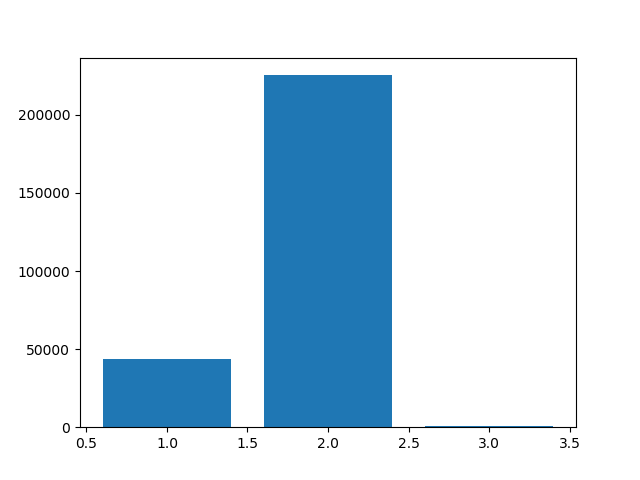

In [83]:
for l in range (0,len(bs)):
    idxs= np.where(h50[l] > 0)[0]
    v = h50[l][idxs]
    figure(l)
    bar(idxs, v)

# 3) Classificazione delle cellule da parte dei nuovi grafi

In [80]:
import anndata

In [81]:
adata=sc.read('adata_10x/adata_sc_10x.h5ad')
adata

AnnData object with n_obs × n_vars = 860 × 1596 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [82]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

In [83]:
df_significativo= pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20) #### df con i 20 geni significativi per gruppo

In [84]:
cell_annotation= pd.read_table('../sc_mixology/data/csv/sc_10x_5cl.metadata.csv.gz', compression="gzip", sep=",", index_col=0)

In [85]:
adata.obs.loc[:, "cell_line"] = cell_annotation.loc[adata.obs_names, "cell_line"]
adata.obs.columns

Index(['n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase',
       'leiden', 'cell_line'],
      dtype='object')

### bs 10

<IPython.core.display.Javascript object>


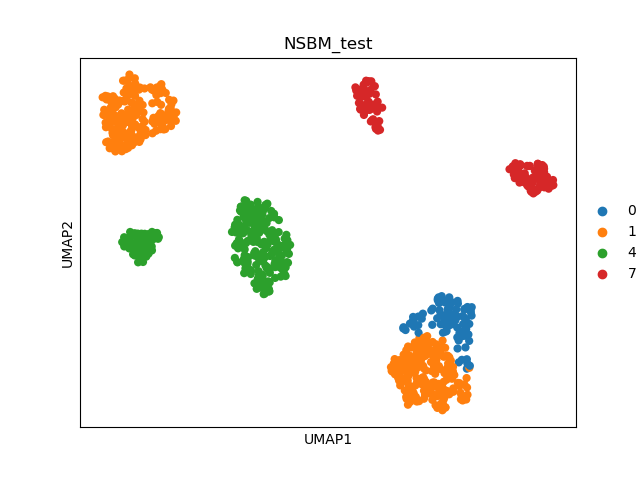

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
0,0,0,0,91,0
1,0,176,7,204,0
4,62,0,4,1,188
7,0,0,127,0,0


In [87]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state10.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### bs 14

<IPython.core.display.Javascript object>


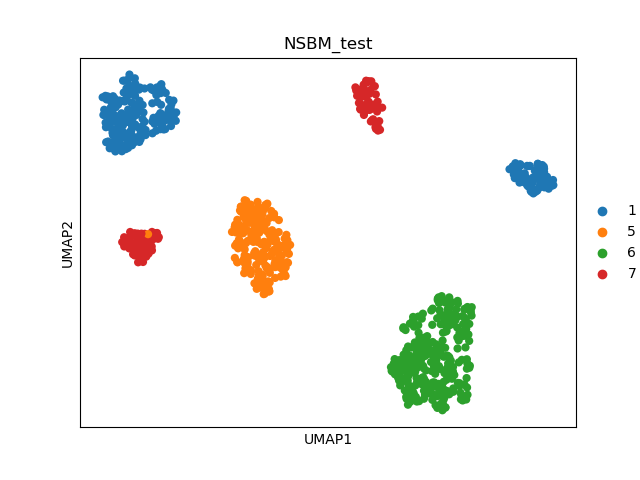

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
1,0,176,78,0,0
5,1,0,4,1,188
6,0,0,0,295,0
7,61,0,56,0,0


In [88]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state14.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### bs 18

<IPython.core.display.Javascript object>


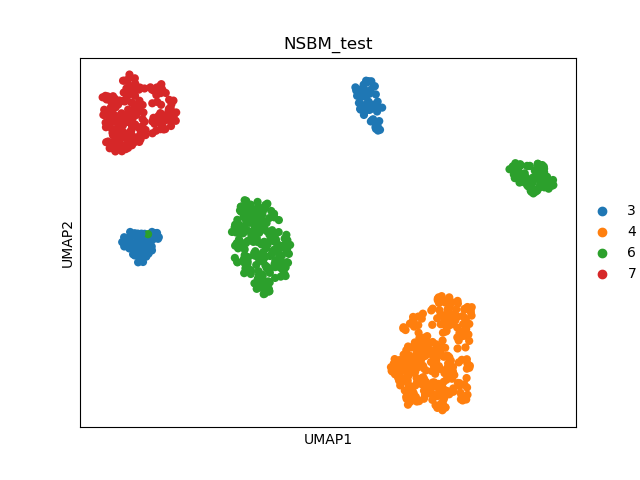

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
3,61,0,56,0,0
4,0,0,0,295,0
6,1,0,75,1,188
7,0,176,7,0,0


In [89]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state18.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### bs 22

<IPython.core.display.Javascript object>


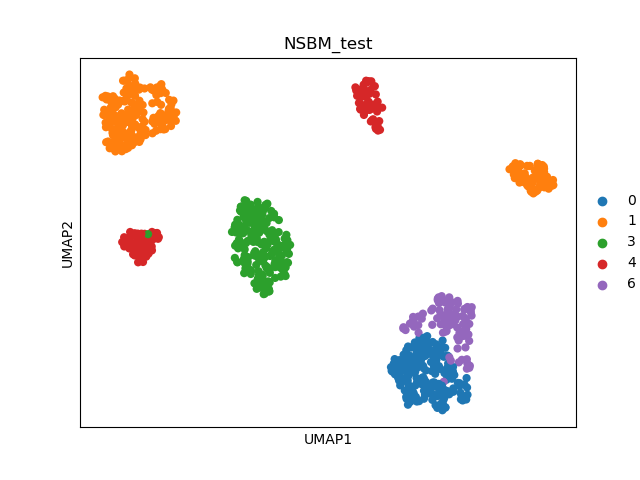

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
0,0,0,0,200,0
1,0,176,78,0,0
3,1,0,4,1,188
4,61,0,56,0,0
6,0,0,0,95,0


In [90]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state22.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### bs 26

<IPython.core.display.Javascript object>


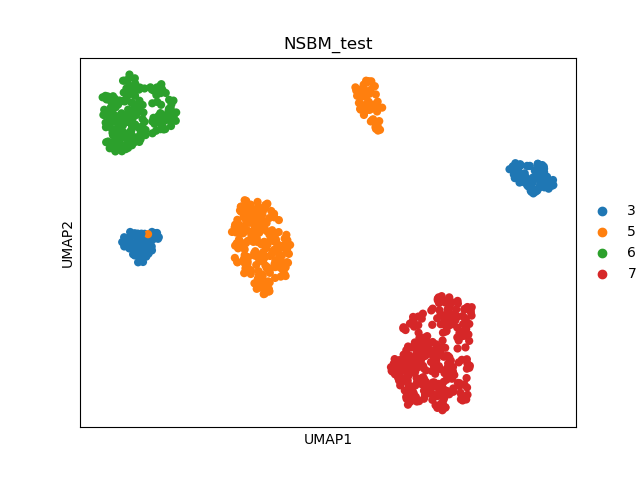

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
3,61,0,71,0,0
5,1,0,60,1,188
6,0,176,7,0,0
7,0,0,0,295,0


In [91]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state26.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### bs 30

<IPython.core.display.Javascript object>


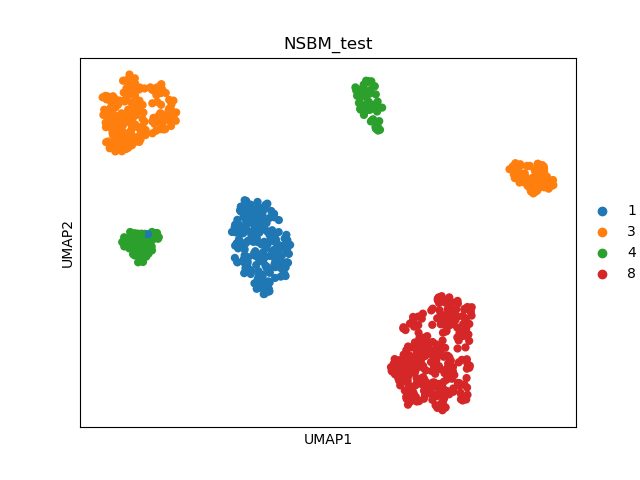

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
1,1,0,4,1,188
3,0,176,78,0,0
4,61,0,56,0,0
8,0,0,0,295,0


In [92]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state30.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 10

In [94]:
state10000 = pickle.load( open( "adata_10x/10x_force_niter/fn_10.pkl", "rb" ) )

<IPython.core.display.Javascript object>


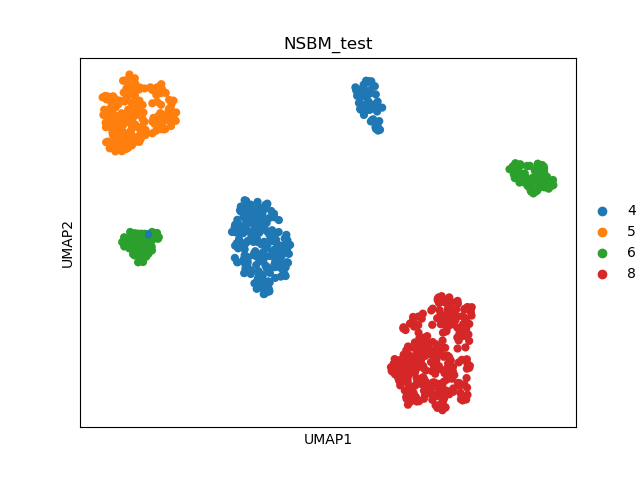

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
4,1,0,60,1,188
5,0,176,7,0,0
6,61,0,71,0,0
8,0,0,0,295,0


In [95]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state10000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 15

In [96]:
state15000 = pickle.load( open( "adata_10x/10x_force_niter/fn_15.pkl", "rb" ) )

<IPython.core.display.Javascript object>


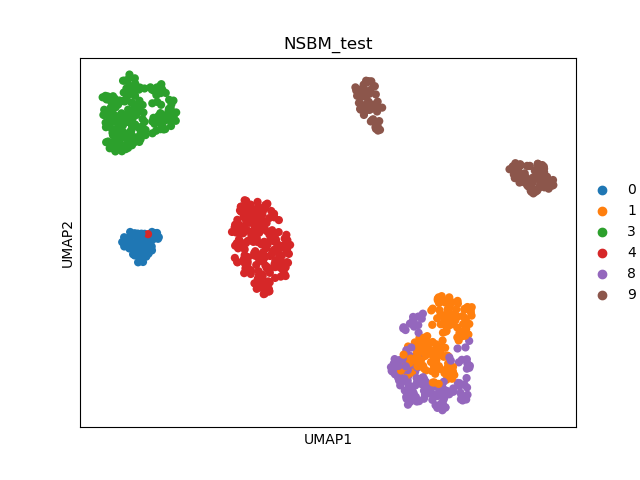

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
0,61,0,0,0,0
1,0,0,0,153,0
3,0,176,7,0,0
4,1,0,4,1,188
8,0,0,0,142,0
9,0,0,127,0,0


In [97]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state15000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 20

In [98]:
state20000 = pickle.load( open( "adata_10x/10x_force_niter/fn_20.pkl", "rb" ) )

<IPython.core.display.Javascript object>


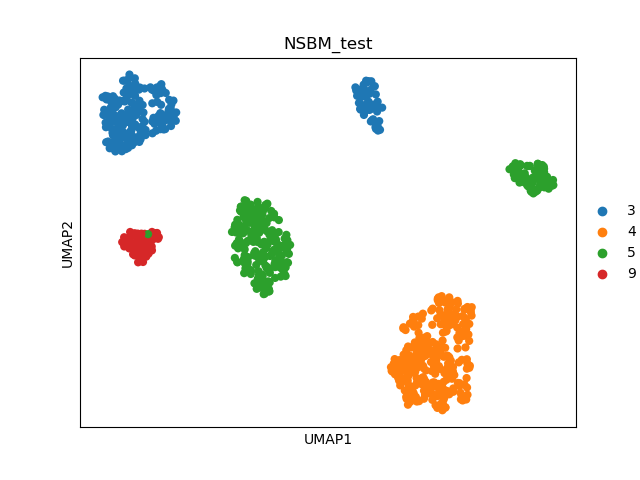

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
3,0,176,63,0,0
4,0,0,0,295,0
5,1,0,75,1,188
9,61,0,0,0,0


In [99]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state20000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 25

In [100]:
state25000 = pickle.load( open( "adata_10x/10x_force_niter/fn_25.pkl", "rb" ) )

<IPython.core.display.Javascript object>


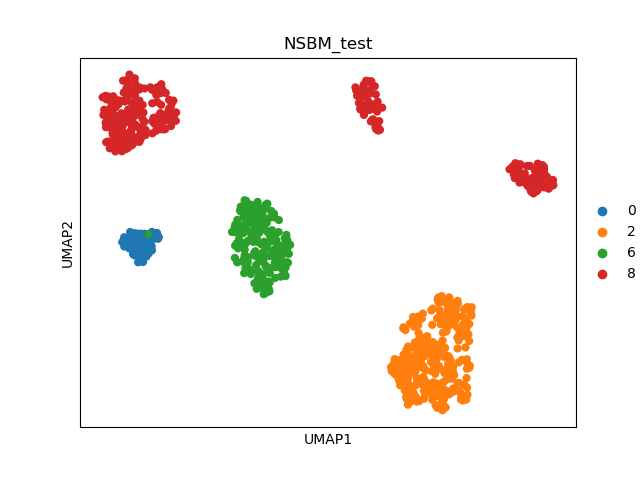

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
0,61,0,0,0,0
2,0,0,0,295,0
6,1,0,4,1,188
8,0,176,134,0,0


In [101]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state25000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 30

In [102]:
state30000 = pickle.load( open( "adata_10x/10x_force_niter/fn_30.pkl", "rb" ) )

<IPython.core.display.Javascript object>


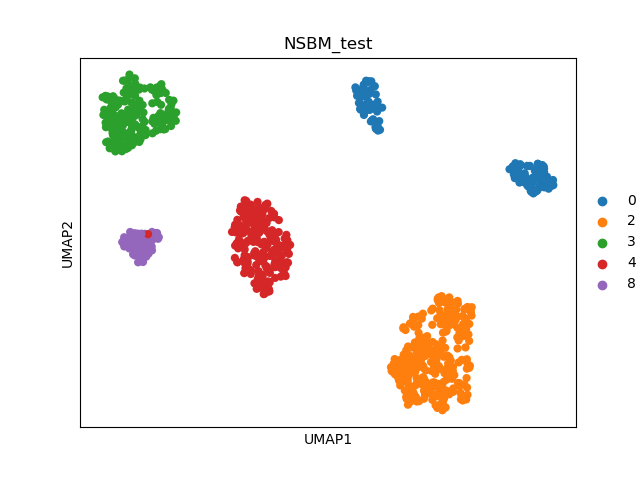

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
0,0,0,127,0,0
2,0,0,0,295,0
3,0,176,7,0,0
4,1,0,4,1,188
8,61,0,0,0,0


In [103]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state30000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 35

In [104]:
state35000 = pickle.load( open( "adata_10x/10x_force_niter/fn_35.pkl", "rb" ) )

<IPython.core.display.Javascript object>


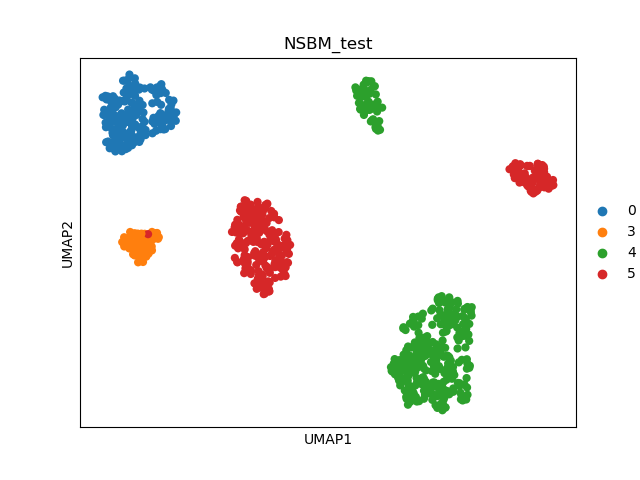

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
0,0,176,7,0,0
3,61,0,0,0,0
4,0,0,56,295,0
5,1,0,75,1,188


In [105]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state35000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 40

In [106]:
state40000 = pickle.load( open( "adata_10x/10x_force_niter/fn_40.pkl", "rb" ) )

<IPython.core.display.Javascript object>


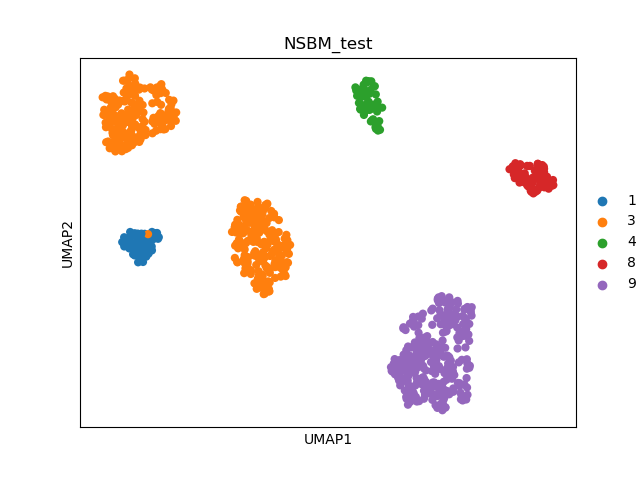

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
1,61,0,0,0,0
3,1,176,11,1,188
4,0,0,56,0,0
8,0,0,71,0,0
9,0,0,0,295,0


In [107]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state40000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 45

In [108]:
state45000 = pickle.load( open( "adata_10x/10x_force_niter/fn_45.pkl", "rb" ) )

<IPython.core.display.Javascript object>


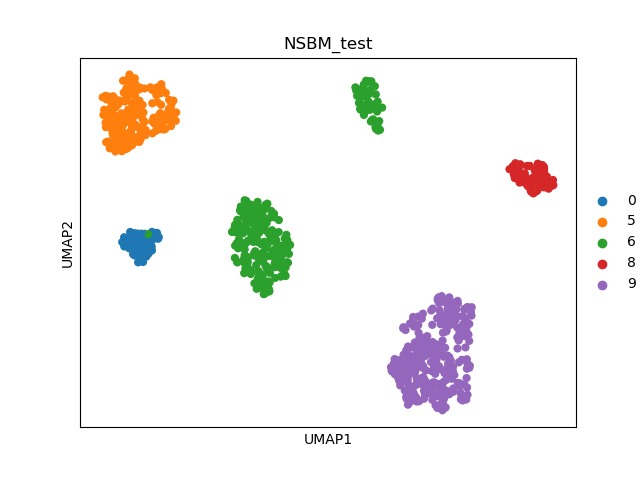

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
0,61,0,0,0,0
5,0,176,7,0,0
6,1,0,60,1,188
8,0,0,71,0,0
9,0,0,0,295,0


In [109]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state45000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 50

In [110]:
state50000 = pickle.load( open( "adata_10x/10x_force_niter/fn_50.pkl", "rb" ) )

<IPython.core.display.Javascript object>


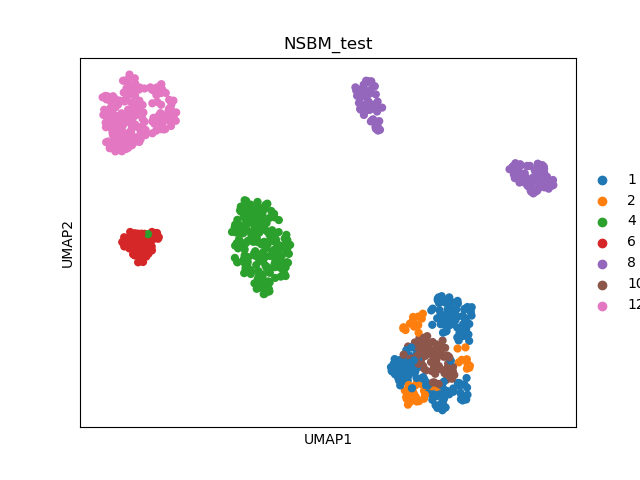

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
1,0,0,0,171,0
2,0,0,0,49,0
4,1,0,4,1,188
6,61,0,0,0,0
8,0,0,127,0,0
10,0,0,0,75,0
12,0,176,7,0,0


In [113]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state50000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)